In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("HousingDataFull.csv")
#df.isnull().sum()

In [3]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [6]:
model = DecisionTreeRegressor(max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

In [7]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Decision Tree')

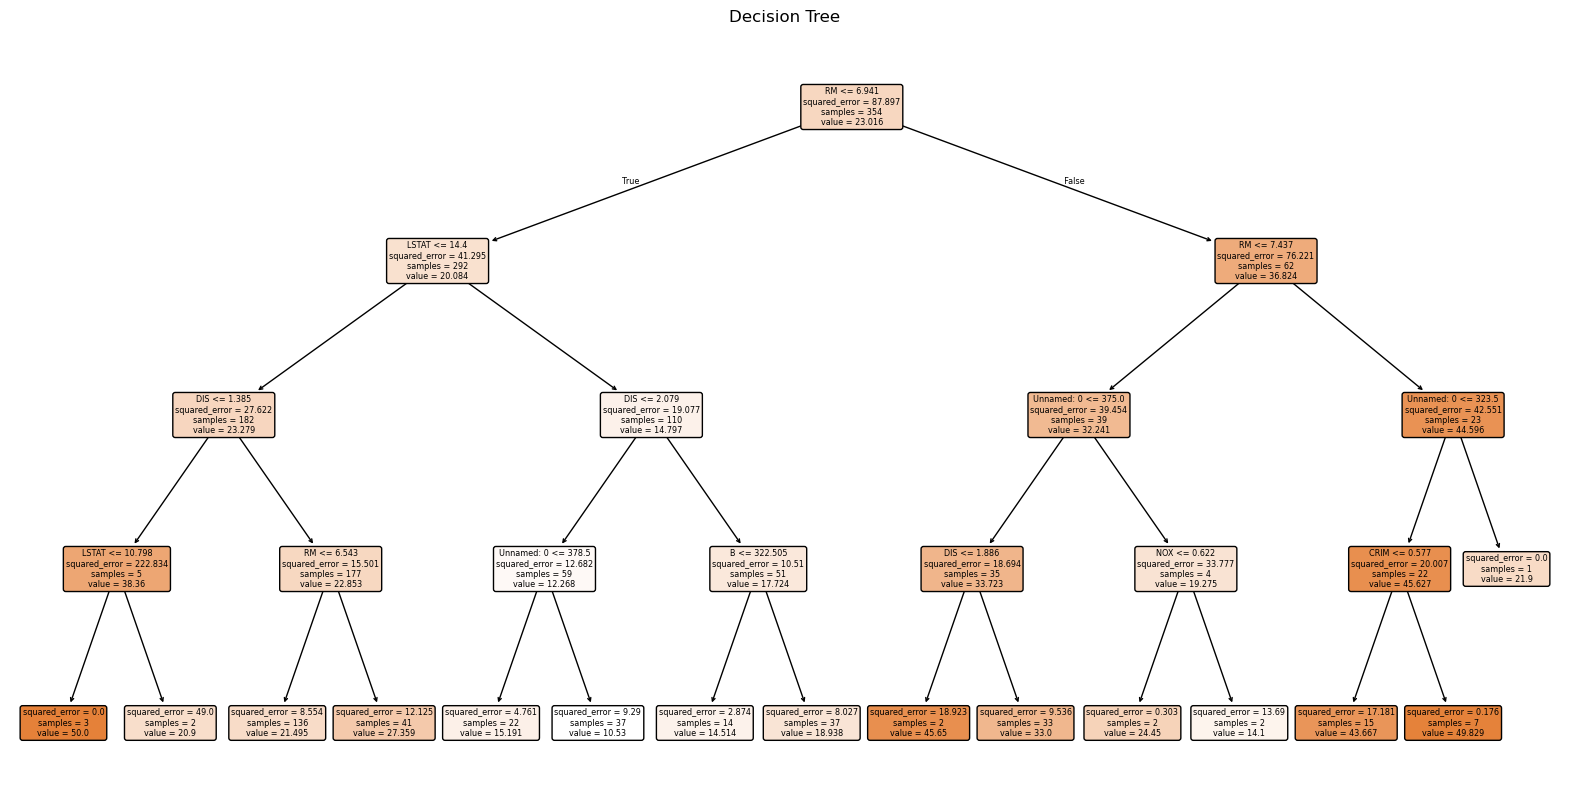

In [8]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree")

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) #1e yakınlık -> daha iyi
mae,mse, r2

(2.9880065370585127, 19.943900977519274, 0.7323436796508578)

<Axes: >

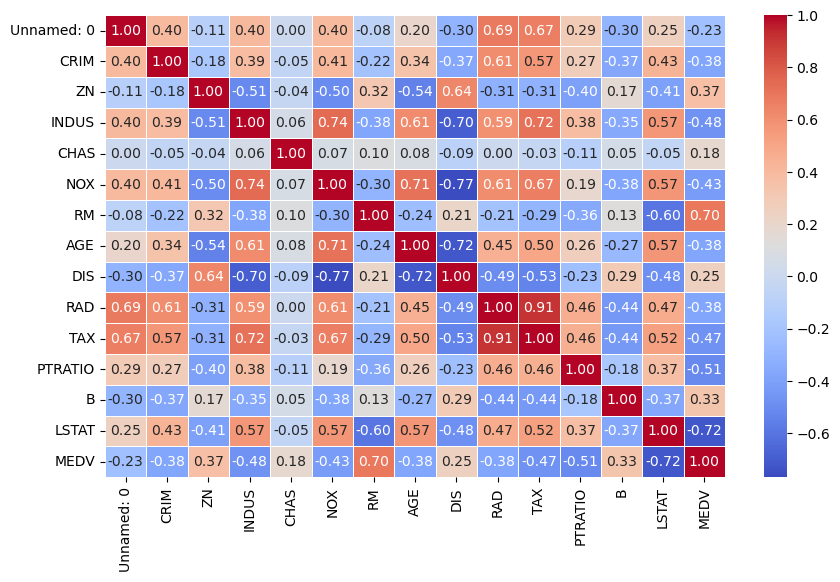

In [11]:
# seaborn
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
model2 = RandomForestRegressor(n_estimators=5000, random_state=42) # n_estimators => Kaç DT oluşsun?
model2.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5000, random_state=42)

In [14]:
y_pred2 = model2.predict(X_test)

In [15]:
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
r22 = r2_score(y_test, y_pred2) #1e yakınlık -> daha iyi
mae2,mse2, r22

# (2.776796292821953, 13.016181076408452, 0.8253168657507561) - DT
# (2.137743421052632, 10.094694756578951, 0.8645245553194789) - RF n_est=100
# (2.144263157894737, 10.25112289473684, 0.8624252177873881) - RF n_est=50
# (2.095193421052633, 9.312044693947362, 0.8750280789842386) - RF n_est=500
# (2.090231973684216, 9.325745916723651, 0.8748442022754283) - RF n_est=5000

(2.080317368421062, 9.831530014152618, 0.8680563471531257)